In [36]:
# Importing basic modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
# Importing sklearn modules

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score

In [21]:
train = pd.read_csv('1/train.csv')
test =pd.read_csv('1/test.csv')

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
# Select only numerical columns
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

train = train.select_dtypes(include=numerical)
test = test.select_dtypes(include=numerical)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
train ['TotalBathrooms'] = ( train ['FullBath'] + 0.5 * train ['HalfBath'] + train ['BsmtFullBath'] + 0.5 * train ['BsmtHalfBath'])
test ['TotalBathrooms'] = ( test ['FullBath'] + 0.5 * test ['HalfBath'] + test ['BsmtFullBath'] + 0.5 * test ['BsmtHalfBath'])

In [25]:
# Performing train, test and split
y_train = train['SalePrice']
x_train = train[['TotalBathrooms', 'GrLivArea', 'BedroomAbvGr']]
x_test = test[['TotalBathrooms', 'GrLivArea', 'BedroomAbvGr']]

In [26]:
x_test.isnull().sum()

TotalBathrooms    2
GrLivArea         0
BedroomAbvGr      0
dtype: int64

In [27]:
x_test = x_test.fillna(0)

In [28]:
x_test.isnull().sum()

TotalBathrooms    0
GrLivArea         0
BedroomAbvGr      0
dtype: int64

In [29]:
# Fitting Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
# Predicting Value
train_pred = model.predict(x_train)
print(train_pred)

[235812.97141766 161110.30899439 243397.9188275  ... 229789.04032411
 151663.11818872 160511.49735677]


In [33]:
# Finding MSE and r2_score
MSE = mean_squared_error(y_train, train_pred)
print("Mean Squared Error:",MSE)
r2 = r2_score(y_train, train_pred)
print("R2 Score:",r2)

Mean Squared Error: 2435642603.2188134
R2 Score: 0.6138062073498352


In [37]:
results = pd.DataFrame(['LinearRegression', MSE, r2]).transpose()
results.columns = ['Method', 'Mean Squared Error', 'R2 Score']
print(results)

             Method Mean Squared Error  R2 Score
0  LinearRegression  2435642603.218813  0.613806


In [46]:
# Finding Accuracy
accuracy = pd.DataFrame({"Actual Price": y_train, "Predicted Price": train_pred, "Error": train_pred - y_train })
accuracy.head()

,Actual Price,Predicted Price,Error
0,208500,235812.971418,27312.971418
1,181500,161110.308994,-20389.691006
2,223500,243397.918827,19897.918827
3,140000,191524.494773,51524.494773
4,250000,260604.255122,10604.255122


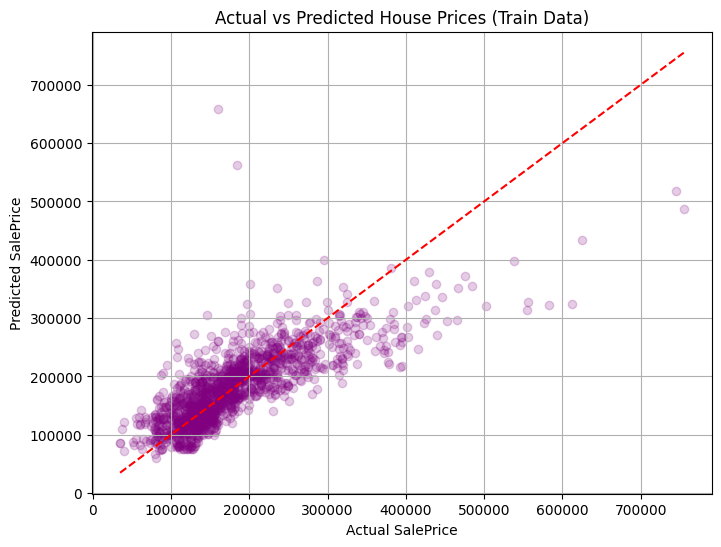

In [42]:
# Data Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_train, train_pred, alpha=0.2, color='purple')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices (Train Data)")
plt.grid(True)
plt.show()